In [1]:
#Camille Chow
#ECE 471 Assignment 2

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

BATCH_SIZE = 32
NUM_BATCHES = 10000
NUM_SAMP = 200

In [2]:
class Data():
    def __init__(self):
        sigma = 0.1
        np.random.seed(1)           #change after testing

        #training data for label 0
        self.index = np.arange(NUM_SAMP)        
        self.t0 = np.random.uniform(.1, 1.8, NUM_SAMP)
        self.x0 = np.atleast_2d(6 * self.t0 * np.cos(2*np.pi*self.t0) + np.random.normal(0, sigma, NUM_SAMP)).T
        self.y0 = np.atleast_2d(6 * self.t0 * np.sin(2*np.pi*self.t0) + np.random.normal(0, sigma, NUM_SAMP)).T
        self.class0 = np.vstack((self.x0, self.y0))
        #training data for label 1
        self.t1 = np.random.uniform(.1, 1.8, NUM_SAMP)
        self.x1 = np.atleast_2d(6 * self.t1 * np.cos(2*np.pi*self.t1 + np.pi) + np.random.normal(0, sigma, NUM_SAMP)).T
        self.y1 = np.atleast_2d(6 * self.t1 * np.sin(2*np.pi*self.t1 + np.pi) + np.random.normal(0, sigma, NUM_SAMP)).T
        self.class1 = np.vstack((self.x1, self.y1))

        self.labels = np.hstack((np.zeros(NUM_SAMP), np.ones(NUM_SAMP)))
        self.coords = np.hstack((self.class0, self.class1))

    def get_batch(self):
        index = np.arange(2 * NUM_SAMP)
        choices = np.random.choice(index, size=BATCH_SIZE)

        return self.coords[choices], self.labels[choices]

In [3]:
# index = np.arange(2 * NUM_SAMP)
# choices = np.random.choice(index, size=BATCH_SIZE)
# print(choices)
# choices = np.random.choice(index, size=BATCH_SIZE)
# print(choices)

In [4]:
# def f(x):   #takes x in R2 and outputs logits and sigmoid
#     layer1_size = 20
#     layer2_size = 10                       #experiment with layer sizes
    
#     w1 = tf.get_variable('w1', [2, layer1_size], tf.float32, tf.random_normal_initializer())    
#     b1 = tf.get_variable('b1', [layer1_size], tf.float32, tf.zeros_initializer())
#     w2 = tf.get_variable('w2', [layer1_size, layer2_size], tf.float32, tf.random_normal_initializer())    
#     b2 = tf.get_variable('b2', [layer2_size], tf.float32, tf.zeros_initializer())
#     w3 = tf.get_variable('w3', [layer2_size, 1], tf.float32, tf.random_normal_initializer())    
#     b3 = tf.get_variable('b3', [], tf.float32, tf.zeros_initializer())  # other initializers???

#     #perceptron
#     layer1 = tf.add(tf.matmul(x, w1), b1)
#     layer2 = tf.add(tf.matmul(tf.nn.elu(layer1), w2), b2)
#     out = tf.add(tf.matmul(tf.nn.elu(layer2), w3), b3)
#                                                          #try other activation functions???
#     return tf.squeeze(out), tf.squeeze(tf.sigmoid(out))

In [5]:
x = tf.placeholder(tf.float32, [None, 2])
t = tf.placeholder(tf.float32, [None])
#logits, t_hat = f(x)

layer1_size = 25
layer2_size = 25                      #experiment with layer sizes

w1 = tf.get_variable('w1', [2, layer1_size], tf.float32, tf.random_normal_initializer())    
b1 = tf.get_variable('b1', [layer1_size], tf.float32, tf.zeros_initializer())
w2 = tf.get_variable('w2', [layer1_size, layer2_size], tf.float32, tf.random_normal_initializer())    
b2 = tf.get_variable('b2', [layer2_size], tf.float32, tf.zeros_initializer())
w3 = tf.get_variable('w3', [layer2_size, 1], tf.float32, tf.random_normal_initializer())    
b3 = tf.get_variable('b3', [1], tf.float32, tf.zeros_initializer())  # other initializers???

#perceptron
layer1 = tf.add(tf.matmul(x, w1), b1)
layer2 = tf.add(tf.matmul(tf.nn.elu(layer1), w2), b2)
out = tf.add(tf.matmul(tf.nn.elu(layer2), w3), b3)

logits, t_hat = tf.squeeze(out), tf.squeeze(tf.sigmoid(out))


lam = .01                 #experiment here
loss = tf.losses.sigmoid_cross_entropy(t, logits) #+ tf.add_n([lam * tf.nn.l2_loss(v) for v in tf.trainable_variables()])
optim = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(loss)        #other optimizers???

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# foo, bar = Data().get_batch()
# #print(foo)
# print(sess.run([t_hat], feed_dict={x: foo}))
# # print(sess.run([w1,w2,w3,b1,b2,b3]))

data = Data()

for _ in tqdm(range(0, NUM_BATCHES)):
    x_np, t_np = data.get_batch()
    loss_np, _ = sess.run([loss, optim], feed_dict={x: x_np, t: t_np})
    #print(loss_np)
    #print([v.name + ' ' + str(v.shape) for v in tf.trainable_variables()])
    #raise Exception

100%|██████████| 10000/10000 [00:24<00:00, 414.84it/s]


In [6]:
batch = data.get_batch()
outputs = sess.run(t_hat, feed_dict={x: batch[0]})
print(batch[1])
print(outputs)
rounded = np.round(outputs)
print(rounded)
print(batch[1]-rounded)

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0.]
[0.28617364 0.568709   0.86443675 0.72642857 0.66566235 0.5693475
 0.87363106 0.73670065 0.5803638  0.73670065 0.15803124 0.5940995
 0.35407323 0.89483345 0.9534196  0.594161   0.898561   0.9929259
 0.34626904 0.17908596 0.67512125 0.84462255 0.3266484  0.40474096
 0.21425161 0.6909733  0.898561   0.9302177  0.46340382 0.5872774
 0.95971406 0.21425161]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0.]
[ 0. -1. -1. -1.  0. -1.  0. -1.  0. -1.  0. -1.  0.  0.  0.  0. -1.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]


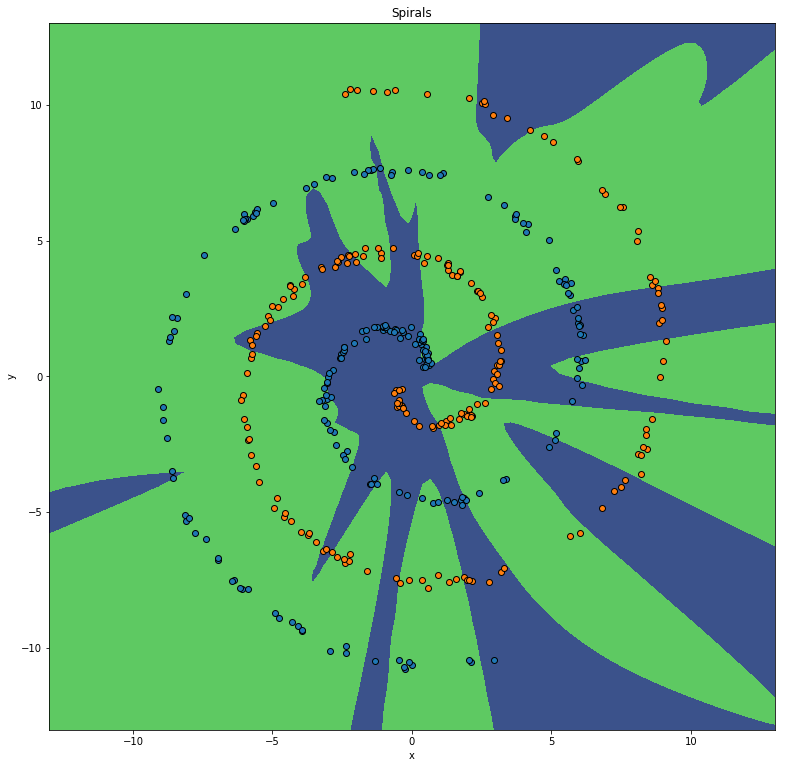

In [7]:
xaxis = np.linspace(-13, 13, 100)
yaxis = np.linspace(-13, 13, 100)
xx, yy = np.meshgrid(xaxis,yaxis)
coords = np.array(list(zip(xx.flatten(), yy.flatten())))

z = sess.run(t_hat, feed_dict={x: coords})
z = np.reshape(z, [100, 100])

plt.figure(1, figsize=[13,13])

plt.contourf(xx, yy, z, [0, .5, 1])

plt.scatter(data.x0,data.y0, edgecolor='k')
plt.scatter(data.x1,data.y1, edgecolor='k')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Spirals')

plt.show()